### MUH.ASRUL _ 220907501040

#### Import Library

In [60]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from statsmodels.stats.diagnostic import het_breuschpagan

# UJi Autokorelasi
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# UJI Heteroskedastisitas 
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# UJI Mulikolonieritas
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Algortima Regresi dengan paket STATMODEL
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

#### Load Data Via URL (Github)

In [2]:
data_asrul = pd.read_csv('https://raw.githubusercontent.com/muhasrhul/MUH.ASRUL/main/data_asrul.csv')
data_asrul

,X1,X2,Y
0,50,20,60
1,40,25,55
2,60,30,65
3,55,35,70
4,45,40,62
5,65,50,75
6,70,55,80
7,75,60,85
8,80,65,90
9,90,70,95


#### Memisahkan Variable Independen Dan Variable Dependen

In [3]:
# Variable Prediktor
X = data_asrul[['X1','X2']]

# Variable Target
y = data_asrul['Y']

#### Membuat Model Regression

In [4]:
regressi = LinearRegression()
regressi.fit(X,y)

LinearRegression()

#### Menampilkan koefisien dan intercept dari model regressi yang kita buat sebelumnya

In [6]:
coef_x1 = regressi.coef_[0]
coef_x2 = regressi.coef_[1]
intercept = regressi.intercept_

print(f'Koefisien X1: {coef_x1}')
print(f'Koefisien X2: {coef_x2}')
print(f'Intercept: {intercept}')

Koefisien X1: 0.5297913307401668
Koefisien X2: 0.08976829824709662
Intercept: 34.332153695510115


#### Menampilkan tabel Summary

In [15]:
# Menambahkan kolom konstanta (intercept)
data_asrul = sm.add_constant(data_asrul)
# Membentuk model regresi
model = sm.OLS(data_asrul['Y'], data_asrul[['const', 'X1', 'X2']])
# Melakukan fitting model
results = model.fit()
# Menampilkan persamaan regresi
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     39.02
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           3.20e-06
Time:                        07:56:48   Log-Likelihood:                -47.385
No. Observations:                  16   AIC:                             100.8
Df Residuals:                      13   BIC:                             103.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3322      6.043      5.681      0.0

#### Menampilkan Visual Menggunakan Scatter Axes3D

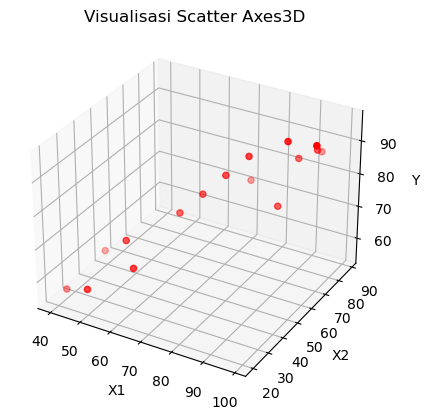

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_asrul['X1'], data_asrul['X2'], data_asrul['Y'], c='r', marker='o')
plt.title('Visualisasi Scatter Axes3D')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.savefig('Visualisasi Scatter Axes3D')
plt.show()

#### Prediksi hasil regresi untuk plot permukaan

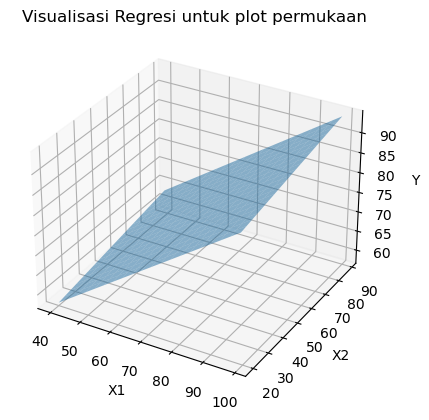

In [25]:
x1_range = np.linspace(data_asrul['X1'].min(), data_asrul['X1'].max(), 20)
x2_range = np.linspace(data_asrul['X2'].min(), data_asrul['X2'].max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

data_to_predict = np.column_stack((x1_mesh.ravel(), x2_mesh.ravel()))
y_pred = regressi.predict(data_to_predict)
y_pred = y_pred.reshape(x1_mesh.shape)


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(x1_mesh, x2_mesh, y_pred, alpha=0.5)

plt.title('Visualisasi Regresi untuk plot permukaan')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.savefig('Visualisasi Regresi untuk plot permukaan')
plt.show()

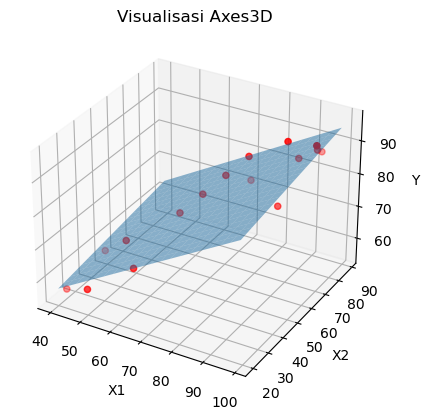

In [27]:
x1_range = np.linspace(data_asrul['X1'].min(), data_asrul['X1'].max(), 20)
x2_range = np.linspace(data_asrul['X2'].min(), data_asrul['X2'].max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

data_to_predict = np.column_stack((x1_mesh.ravel(), x2_mesh.ravel()))
y_pred = regressi.predict(data_to_predict)
y_pred = y_pred.reshape(x1_mesh.shape)


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_asrul['X1'], data_asrul['X2'], data_asrul['Y'], c='r', marker='o')
ax.plot_surface(x1_mesh, x2_mesh, y_pred, alpha=0.5)

plt.title('Visualisasi Axes3D')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.savefig('Visualisasi Axes3D')
plt.show()

#### Scatter plot untuk melihat hubungan antara X1, X2, dan Y

In [50]:
# Data asrul dan fitting model
data_asrul = sm.add_constant(data_asrul)  # Tambahkan kolom konstanta
X = data_asrul[['const', 'X1', 'X2']]  # Variabel independen
y = data_asrul['Y']  # Variabel dependen
model = sm.OLS(y, X).fit()  # Membuat model regresi OLS

fig = go.Figure(data=[
    go.Scatter3d(x=data_asrul['X1'], y=data_asrul['X2'], z=data_asrul['Y'], mode='markers',
                 marker=dict(size=5), name='Data Points')])

# Regresi berganda sebagai bidang
xx, yy = np.meshgrid(data_asrul['X1'], data_asrul['X2'])
zz = model.params['const'] + model.params['X1'] * xx + model.params['X2'] * yy
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, opacity=0.8, colorscale='Viridis', name='Regression Plane'))

fig.update_layout(scene=dict(xaxis_title='X1', yaxis_title='X2', zaxis_title='Y'),
                  title='Scatter Plot 3D with Regression Plane')
plt.savefig('Scatter Plot 3D with Regression Plane')
fig.show()

_, p_value, _, _ = het_breuschpagan(model.resid, X)
if p_value < 0.05:
    print("Terdapat bukti heteroskedastisitas.")
else:
    print("Tidak terdapat bukti heteroskedastisitas.")


Tidak terdapat bukti heteroskedastisitas.


<Figure size 640x480 with 0 Axes>

#### Uji Autokorelasi With Plot ACF

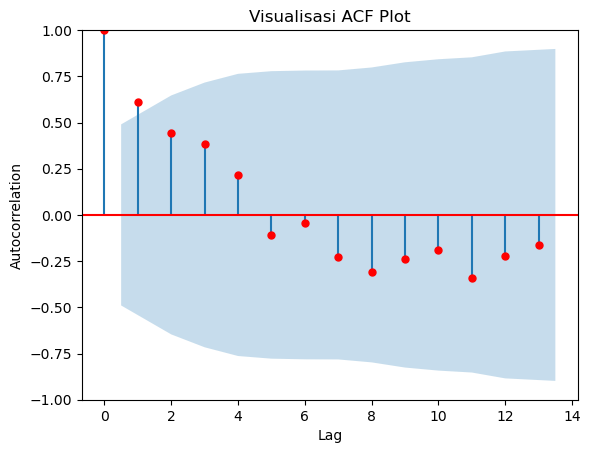

In [51]:
fig, ax = plt.subplots()
plot_acf(data_asrul['Y'], ax=ax, color='r')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
plt.title('Visualisasi ACF Plot')

plt.savefig('Visualisasi ACF Plot')
plt.show()

#### Uji Heteroskedastisitas

In [61]:
X = data_asrul[['X1','X2']]
y = data_asrul['Y']

X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
result_het_white_test = het_white(result.resid, X)
print(result_het_white_test)

(3.899486025988436, 0.5639765013406288, 0.6445157675720908, 0.6720530767706143)


#### Uji Multikolinieritas

In [63]:
Vrince_inflation_factor = pd.DataFrame()
Vrince_inflation_factor['VIF'] = [variance_inflation_factor(data_asrul.values, i) for i in range(data_asrul.shape[1])]
Vrince_inflation_factor.set_index(data_asrul.columns, inplace=True)

print(Vrince_inflation_factor)

             VIF
const  75.595265
X1     10.724244
X2      6.522216
Y       7.003617
